# Evaluation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import music21

import sys
sys.path.append('../')
from solmization import solmize, Corpus

CORPORA = ['marot-de-beze', 'sternhold-hopkins', 'philips-van-marnix', 'davantes', 'smith']

In [2]:
def report_percentiles(df, percentiles = [1, .95, .9, .85, .8]):
    total_notes =  df['num_notes'].sum()
    total_correct = df['correct'].sum()
    total_errors = total_notes - total_correct
    print(f'Total number of notes: {total_notes}')
    print(f'Total number of correct notes: {total_correct} ({total_correct / total_notes:.0%})')
    print(f'Total number of errors: {total_errors} ({total_errors/total_notes:.0%})')
    for percentile in percentiles:
        count = sum(df['accuracy'] >= percentile)
        print(f'Works with >= {percentile*100}% accuracy: {count} ({count/len(df):.0%})')

In [3]:
def violin_plot(df, title):
    plt.figure(figsize=(7, 2))
    sns.violinplot(
        data=df[['accuracy', 'perc_missing', 'perc_incorrect']], 
        inner='point', cut=0, orient='y')
    plt.gca().set_yticklabels(['Accuracy', '% missing', '% incorrect'])
    sns.despine()
    plt.title(f'{title}: evaluation results', x=0, ha='left')

## Write all output

In [5]:
marot_de_beze = Corpus('marot-de-beze')
marot_de_beze.evaluate(write_output=True, output_dir='latest', refresh=True);

  0%|          | 0/26 [00:00<?, ?it/s]

In [6]:
sternhold_hopkins = Corpus('sternhold-hopkins')
sternhold_hopkins.evaluate(write_output=True, output_dir='latest', refresh=True);

  0%|          | 0/20 [00:00<?, ?it/s]

,correct,missing,insertion,deletion,incorrect,num_notes,num_syllables,accuracy,status,perc_incorrect,perc_missing
SH001,56,0,0,0,0,56,56,1.0,success,0.0,0.0
SH002,56,0,0,0,0,56,56,1.0,success,0.0,0.0
SH003,56,0,0,0,0,56,56,1.0,success,0.0,0.0
SH004,22,0,0,0,0,22,22,1.0,success,0.0,0.0
SH005,56,0,0,0,0,56,56,1.0,success,0.0,0.0
SH006,56,0,0,0,0,56,56,1.0,success,0.0,0.0
SH007,55,0,0,0,1,56,56,0.982143,success,0.017857,0.0
SH008,56,0,0,0,0,56,56,1.0,success,0.0,0.0
SH009,56,0,0,0,0,56,56,1.0,success,0.0,0.0
SH010,44,1,0,0,40,85,84,0.52381,success,0.470588,0.011765


In [ ]:
van_marnix = Corpus('van-marnix')
van_marnix.evaluate(write_output=True, output_dir='latest', refresh=True);

In [4]:
davantes = Corpus('davantes')
davantes.evaluate(
    target_lyrics="davantes_numbering",
    style="davantes",
    output_style="davantes",
    write_output=True,
    output_dir='latest',
    refresh=True,
    max_num_paths=4,
);

  0%|          | 0/15 [00:00<?, ?it/s]

In [5]:
smith = Corpus('smith')
smith.evaluate(write_output=True, output_dir='latest', refresh=True);

  0%|          | 0/8 [00:00<?, ?it/s]

## Marot & de Bèze

In [4]:
marot_de_beze = Corpus('marot-de-beze')
# corpus.convert_musescore_files()
marot_de_beze_df = marot_de_beze.evaluate(write_output=True, output_dir='latest')
marot_de_beze_df = marot_de_beze.evaluate()
report_percentiles(marot_de_beze_df)

Total number of notes: 1602
Total number of correct notes: 1579 (99%)
Total number of errors: 23 (1%)
Works with >= 100% accuracy: 18 (69%)
Works with >= 95.0% accuracy: 22 (85%)
Works with >= 90.0% accuracy: 26 (100%)
Works with >= 85.0% accuracy: 26 (100%)
Works with >= 80.0% accuracy: 26 (100%)


/var/folders/3y/17nlr6253yx1qph213774wpw0000gn/T/ipykernel_16548/3254423162.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['Accuracy', '% missing', '% incorrect'])


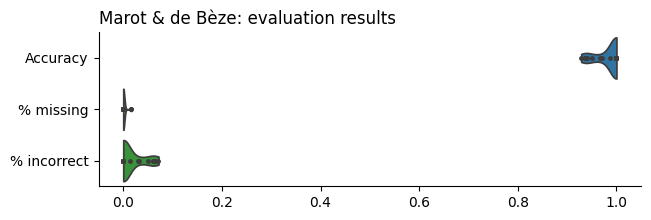

In [5]:
violin_plot(marot_de_beze_df, 'Marot & de Bèze');

## Sternhold & Hopkins

In [6]:
sternhold_hopkins = Corpus('sternhold-hopkins')
# sternhold_hopkins.convert_musescore_files()
sternhold_hopkins_df = sternhold_hopkins.evaluate()

/var/folders/3y/17nlr6253yx1qph213774wpw0000gn/T/ipykernel_16548/3254423162.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['Accuracy', '% missing', '% incorrect'])


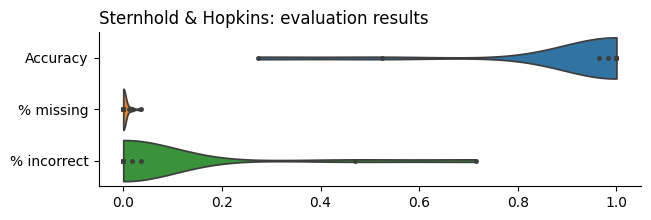

In [7]:
violin_plot(sternhold_hopkins_df, 'Sternhold & Hopkins');

## Philips van Marnix

In [8]:
van_marnix = Corpus('van-marnix')
# van_marnix.convert_musescore_files()
van_marnix_df = van_marnix.evaluate()

/var/folders/3y/17nlr6253yx1qph213774wpw0000gn/T/ipykernel_16548/3254423162.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['Accuracy', '% missing', '% incorrect'])


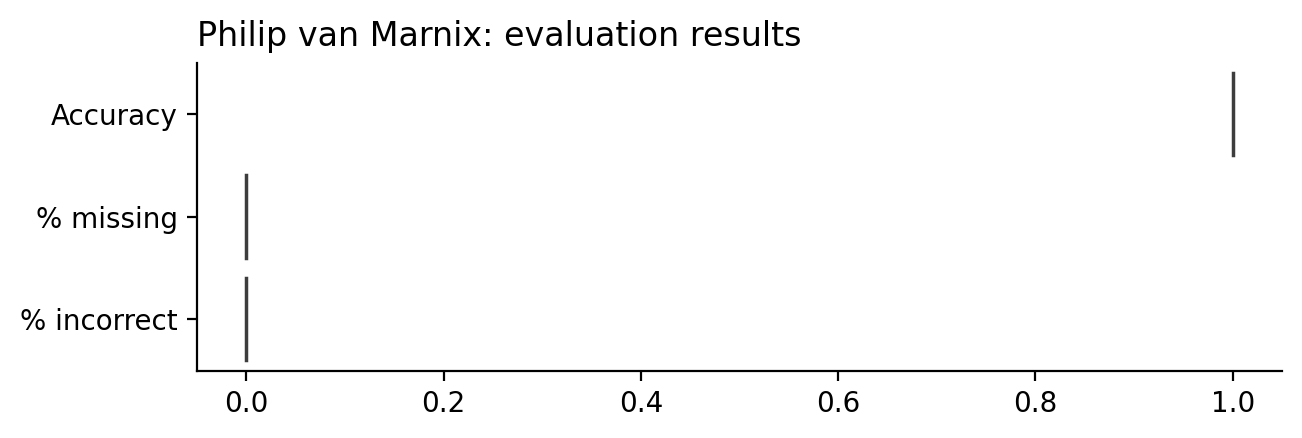

In [9]:
violin_plot(van_marnix_df, 'Philip van Marnix');

## Davantes

In [10]:
davantes = Corpus('davantes')
# davantes.convert_musescore_files()

In [11]:
# Evaluate Davantes' numbering
davantes_numbering_df = davantes.evaluate(
    target_lyrics="davantes_numbering",
    style="davantes",
    output_style="davantes",
    # write_output=True,
    # output_dir='numbering'
)

/var/folders/3y/17nlr6253yx1qph213774wpw0000gn/T/ipykernel_16548/3254423162.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['Accuracy', '% missing', '% incorrect'])


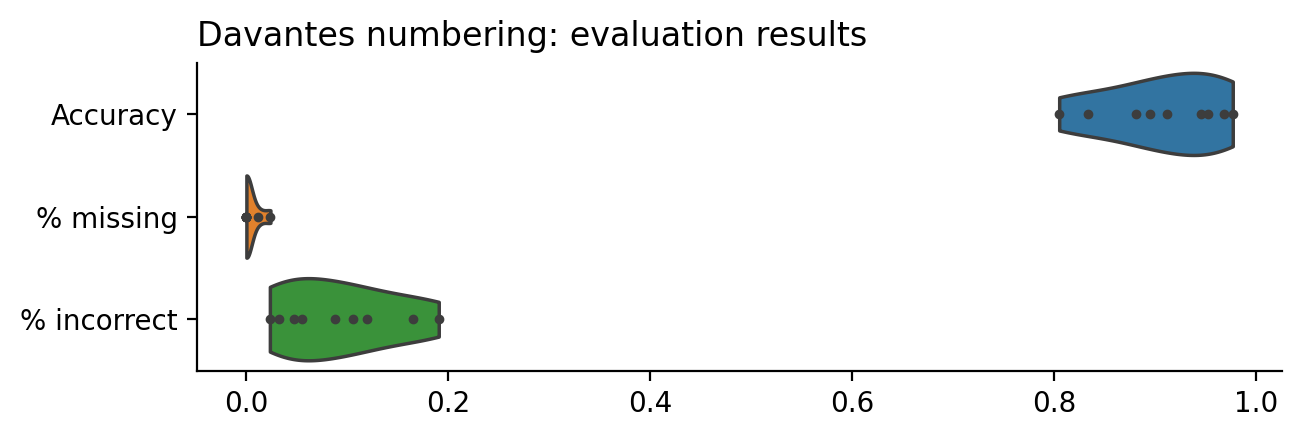

In [12]:
violin_plot(davantes_numbering_df, 'Davantes numbering');

In [13]:
# Evaluate the solmization syllables
davantes_solmization_df = davantes.evaluate(
    target_lyrics="syllables",
    style="syllable",
    # write_output=True,
    # output_dir='syllables'
)

/var/folders/3y/17nlr6253yx1qph213774wpw0000gn/T/ipykernel_16548/3254423162.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['Accuracy', '% missing', '% incorrect'])


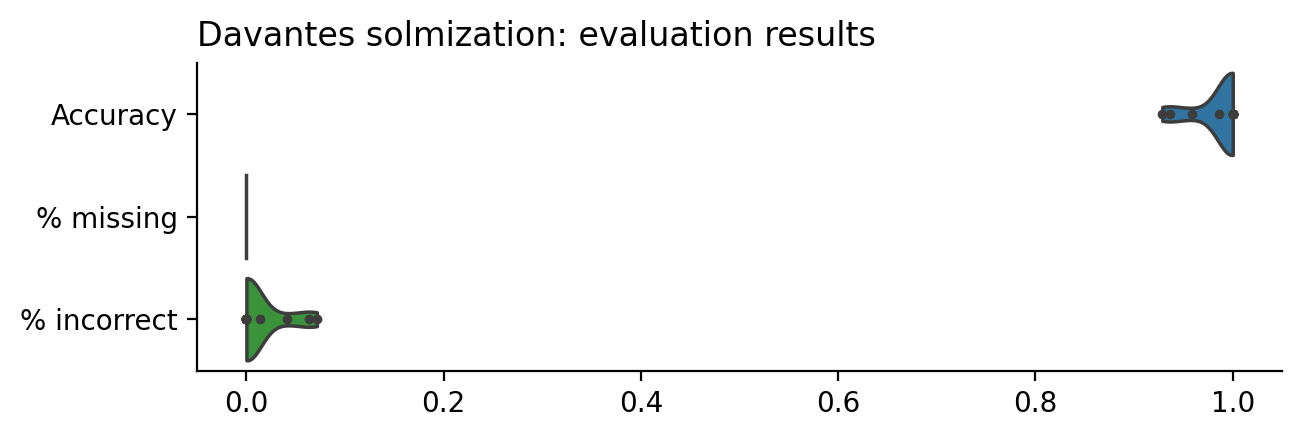

In [14]:
violin_plot(davantes_solmization_df, 'Davantes solmization');

## Smith

In [15]:
smith = Corpus('smith')
smith_df = smith.evaluate()

/var/folders/3y/17nlr6253yx1qph213774wpw0000gn/T/ipykernel_16548/3254423162.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['Accuracy', '% missing', '% incorrect'])


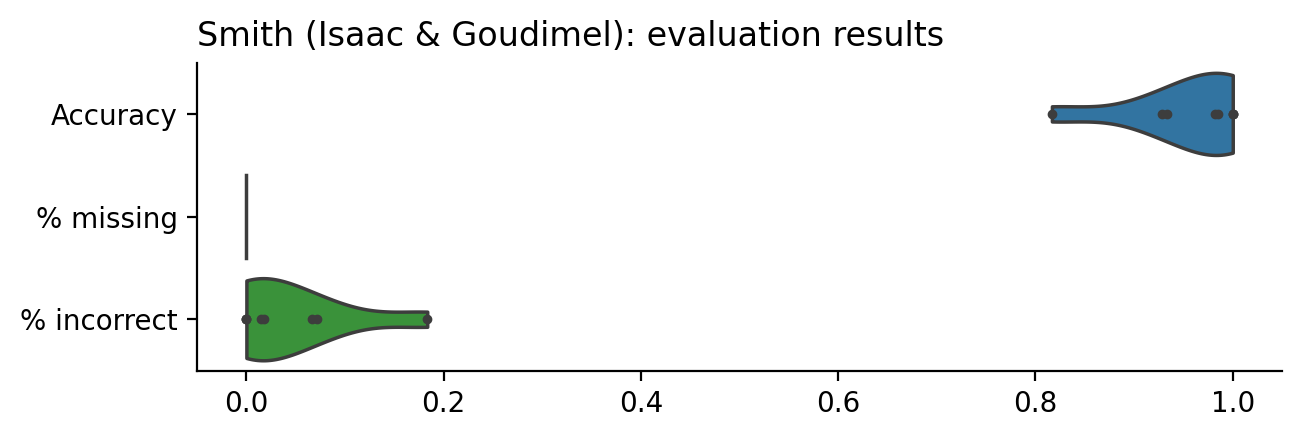

In [16]:
violin_plot(smith_df, 'Smith (Isaac & Goudimel)');

## Combined statistics

In [17]:
smith_df['corpus'] = 'smith'
davantes_solmization_df['corpus'] = 'davantes'
van_marnix_df['corpus'] = 'philip-van-marnix'
sternhold_hopkins_df['corpus'] = 'sternhold-hopkins'
marot_de_beze_df['corpus'] = 'marot-de-beze'
combined = pd.concat([marot_de_beze_df, davantes_solmization_df, van_marnix_df, sternhold_hopkins_df, smith_df])

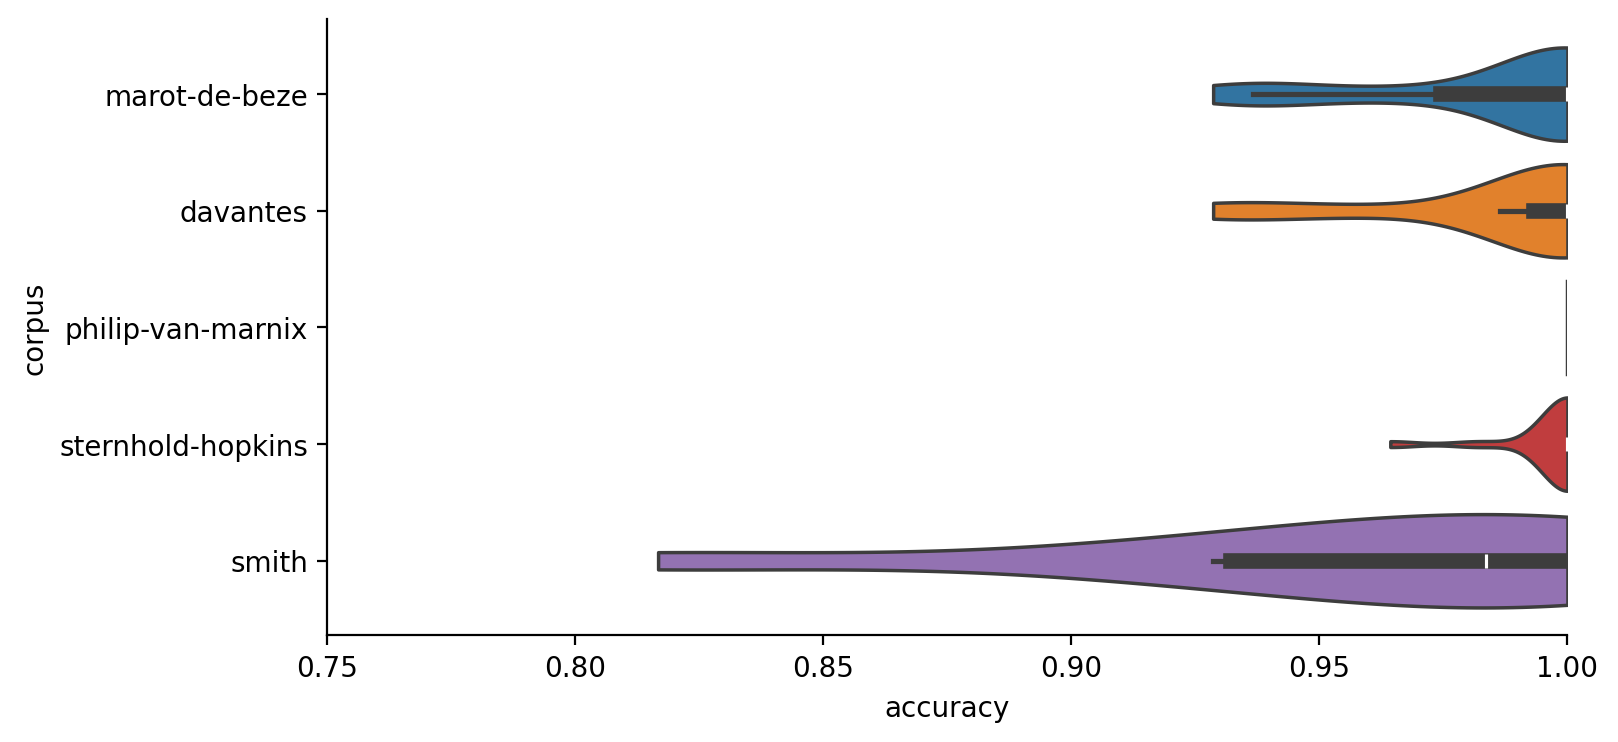

In [18]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=combined[combined['accuracy'] > .7], x='accuracy', y='corpus', hue='corpus', cut=0, density_norm='width', inner='box')
sns.scatterplot(data=combined[combined['accuracy'] < .7], x='accuracy', y='corpus', c='k', marker='x')
plt.xlim(.75, 1)
sns.despine()

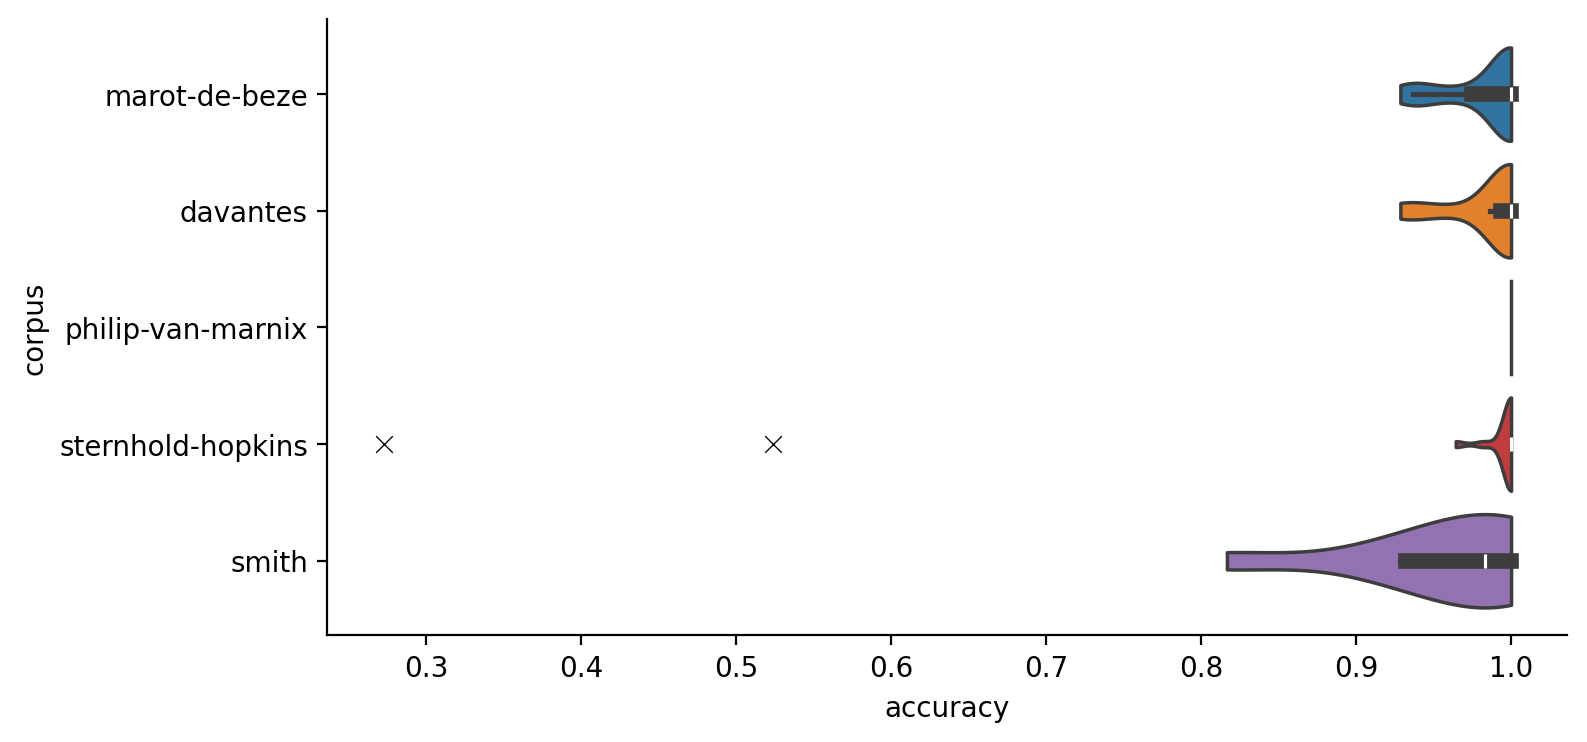

In [19]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=combined[combined['accuracy'] > .7], x='accuracy', y='corpus', hue='corpus', cut=0, density_norm='width', inner='box')
sns.scatterplot(data=combined[combined['accuracy'] < .7], x='accuracy', y='corpus', c='k', marker='x')
sns.despine()